# Comparing asteroid diameters and velocities to the impact probabilities 

## By Akhila Pisupati, for ASTR 302

### Changelog: 
February 26, 2026: Created document, loading in the data

In [1]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.table import QTable, join

import numpy as np

import pandas as pd

import csv

import ipywidgets as wd

from fractions import Fraction

In [4]:
nasa = QTable.read('./nasa_ipcum.ecsv', format = 'ascii.ecsv')
esa = QTable.read('./esa_ipcum.ecsv', format = 'ascii.ecsv')

In [5]:
nasa.info()
esa.info()

<QTable length=2067>
    name    dtype 
----------- ------
   last_obs  str15
      v_inf  str17
     ps_max   str6
   fullname  str24
         ip  str20
        des  str10
          h   str5
      range   str9
last_obs_jd  str12
      n_imp  int64
     ps_cum   str6
     ts_max object
   diameter   str7
         id   str8
<QTable length=1908>
     name      dtype    class     n_bad
-------------- ----- ------------ -----
   object_name str26       Column     0
    diameter_m  str4       Column     0
estimated_flag  str1 MaskedColumn     8
   vi_max_date str16       Column     0
        ip_max  str8       Column     0
        ps_max  str6       Column     0
            ts  str1       Column     0
      vel_km_s  str5       Column     0
         years  str9       Column     0
        ip_cum  str8       Column     0
        ps_cum  str6       Column     0


In [6]:
shared_nasa = QTable.read('./shared_nasa.ecsv', format = 'ascii.ecsv')
shared_esa = QTable.read('./shared_esa.ecsv', format = 'ascii.ecsv')

In [7]:
shared_nasa.info()
shared_esa.info()

<QTable length=1725>
    name    dtype 
----------- ------
   last_obs  str10
      v_inf  str17
     ps_max   str6
   fullname  str12
         ip  str20
        des  str10
          h   str5
      range   str9
last_obs_jd   str9
      n_imp  int64
     ps_cum   str6
     ts_max object
   diameter   str7
         id   str8
<QTable length=1725>
     name      dtype    class     n_bad
-------------- ----- ------------ -----
   object_name  str9       Column     0
    diameter_m  str4       Column     0
estimated_flag  str1 MaskedColumn     8
   vi_max_date str16       Column     0
        ip_max  str8       Column     0
        ps_max  str6       Column     0
            ts  str1       Column     0
      vel_km_s  str5       Column     0
         years  str9       Column     0
        ip_cum  str8       Column     0
        ps_cum  str6       Column     0


DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes._PyLongDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

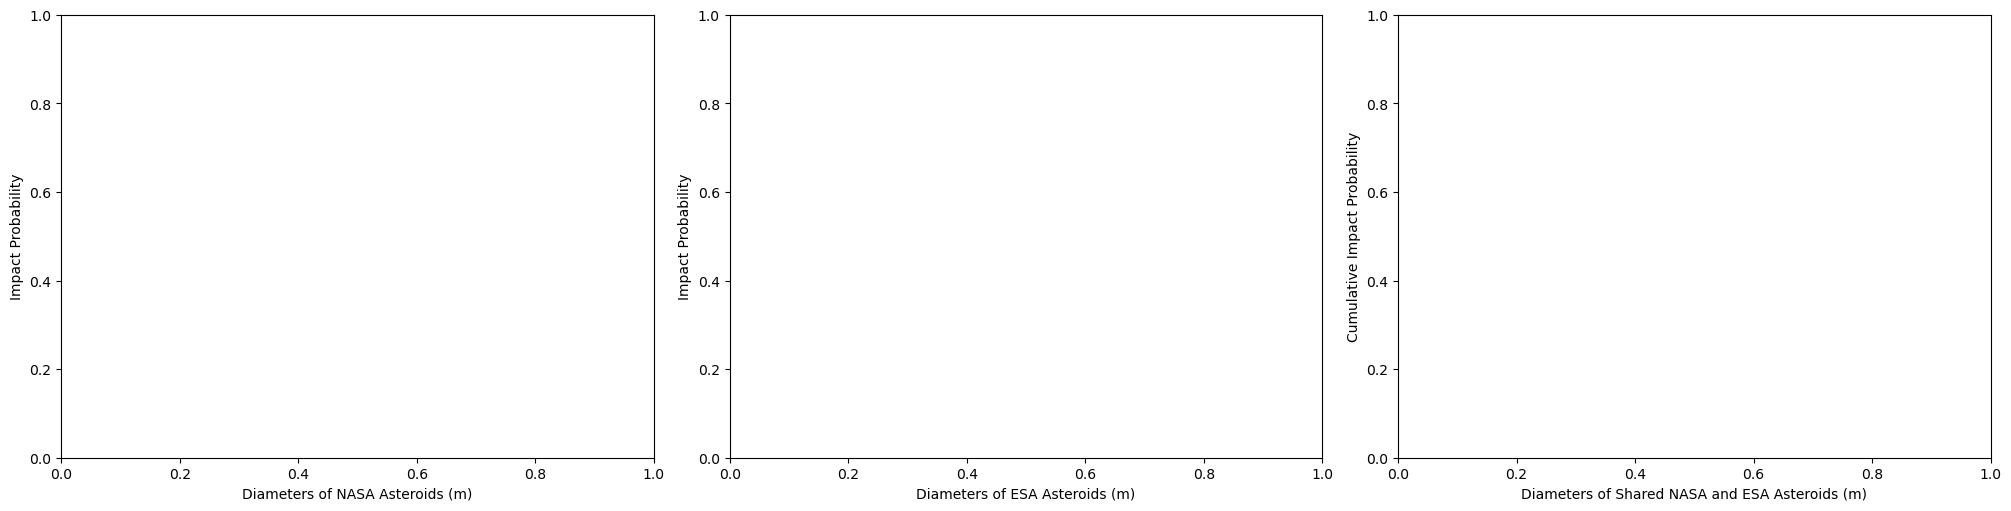

In [33]:
figure, ax = plt.subplot_mosaic('''ABC''', figsize = (20, 5), constrained_layout = True)

ax['A'].set_xlabel("Diameters of NASA Asteroids (m)")
ax['A'].set_ylabel("Impact Probability")

ax['B'].set_xlabel("Diameters of ESA Asteroids (m)")
ax['B'].set_ylabel("Impact Probability")

ax['C'].set_xlabel("Diameters of Shared NASA and ESA Asteroids (m)")
ax['C'].set_ylabel("Cumulative Impact Probability")

nasa_diameter = nasa['diameter']
nasa_ip = (np.linspace(0, nasa['ip'], 1))

ax['A'].plot(nasa_diameter, nasa_ip, 'o', markersize = 2, color = 'blue')